In [39]:
# преобразование таблиц с данными по ковиду в одну

import pandas as pd

covid_data = pd.read_csv('data/covid_data.csv')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')

covid_data = covid_data.groupby( # выкинули информацию по штатами и сгруппировали по странам
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

covid_data['date'] = pd.to_datetime(covid_data['date'])

covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff() # разница между двумя соседними значениями в строках
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()


vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

#display(covid_data.head())
#display(vaccinations_data.head())

 covid_df = covid_data.merge(
    vaccinations_data,
    on=['date','country'],
    how='left'
)
 
 covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
 covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
 display(covid_df.head())
 
 #covid_df.to_csv('data/covid_df.csv', index=False, sep=';')

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...


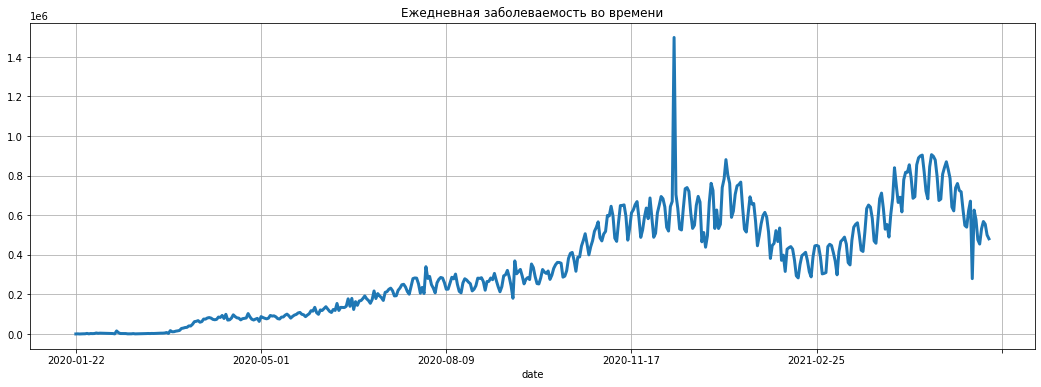

In [87]:
# линейная диаграмма

import pandas as pd

#covid_df = pd.read_csv('data/covid_df.csv',sep=';')

grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum() # объект типа Series
grouped_cases.plot( # не указываем х и у, т.к. ими выступают значения и индексы Series
    kind='line', # тип графика
    figsize=(18, 6), # размер
    title='Ежедневная заболеваемость во времени', # название графика
    grid = True, # отображение сетки
    lw=3 # толщина линии
); # ; чтобы не выводить служебную информацию

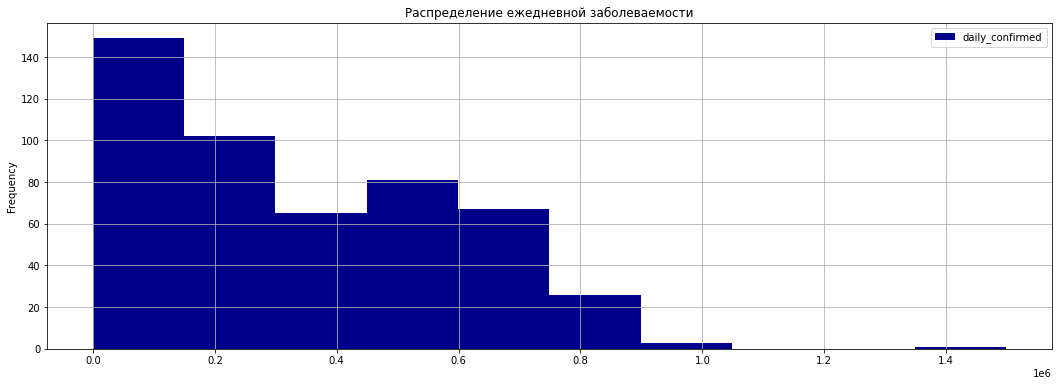

In [99]:
# гистограмма

grouped_cases.plot(
    kind='hist', # гистограмма
    figsize=(18, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'darkblue',
    bins=10, # число прямоугольников
    legend = True
);